In [2]:
#import Dependencies
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

import sklearn as skl
import tensorflow as tf

In [3]:
#import the data to pandas and display it
from google.colab import files
import pandas as pd

# Upload the file
uploaded = files.upload()
loan_df = pd.read_csv("loan_data.csv")
loan_df=loan_df.drop(columns=['DAYS_EMPLOYED','NAME_INCOME_TYPE'])
loan_df

Saving loan_data.csv to loan_data.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_EDUCATION_TYPE,NAME_HOUSING_TYPE,OCCUPATION_TYPE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Secondary / secondary special,House / apartment,Laborers
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Higher education,House / apartment,Core staff
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Secondary / secondary special,House / apartment,Laborers
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Secondary / secondary special,House / apartment,Laborers
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Secondary / secondary special,House / apartment,Core staff
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Secondary / secondary special,With parents,Sales staff
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,Secondary / secondary special,House / apartment,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,Higher education,House / apartment,Managers
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,319500.0,Secondary / secondary special,House / apartment,Laborers


In [4]:
loan_df = loan_df.dropna()


In [5]:
loan_df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_EDUCATION_TYPE,NAME_HOUSING_TYPE,OCCUPATION_TYPE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Secondary / secondary special,House / apartment,Laborers
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Higher education,House / apartment,Core staff
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Secondary / secondary special,House / apartment,Laborers
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Secondary / secondary special,House / apartment,Laborers
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Secondary / secondary special,House / apartment,Core staff
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307504,456248,0,Cash loans,F,N,Y,0,153000.0,331920.0,16096.5,225000.0,Secondary / secondary special,House / apartment,Sales staff
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Secondary / secondary special,With parents,Sales staff
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,Higher education,House / apartment,Managers
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,319500.0,Secondary / secondary special,House / apartment,Laborers


In [ ]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 210887 entries, 0 to 307510
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   SK_ID_CURR           210887 non-null  int64  
 1   TARGET               210887 non-null  int64  
 2   NAME_CONTRACT_TYPE   210887 non-null  object 
 3   CODE_GENDER          210887 non-null  object 
 4   FLAG_OWN_CAR         210887 non-null  object 
 5   FLAG_OWN_REALTY      210887 non-null  object 
 6   CNT_CHILDREN         210887 non-null  int64  
 7   AMT_INCOME_TOTAL     210887 non-null  float64
 8   AMT_CREDIT           210887 non-null  float64
 9   AMT_ANNUITY          210887 non-null  float64
 10  AMT_GOODS_PRICE      210887 non-null  float64
 11  NAME_EDUCATION_TYPE  210887 non-null  object 
 12  NAME_HOUSING_TYPE    210887 non-null  object 
 13  OCCUPATION_TYPE      210887 non-null  object 
dtypes: float64(4), int64(3), object(7)
memory usage: 24.1+ MB


In [6]:
loan_df = pd.get_dummies(loan_df, columns=['NAME_EDUCATION_TYPE', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE','NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY'], drop_first=True, dtype=int)
loan_df

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,...,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_M,CODE_GENDER_XNA,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_Y
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0,0,0,...,0,0,0,0,0,1,1,0,1,1
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307504,456248,0,0,153000.0,331920.0,16096.5,225000.0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
307506,456251,0,0,157500.0,254700.0,27558.0,225000.0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
307508,456253,0,0,153000.0,677664.0,29979.0,585000.0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
307509,456254,1,0,171000.0,370107.0,20205.0,319500.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [8]:
# Split our preprocessed data into our features and target arrays
y = loan_df['TARGET']
X = loan_df.drop(columns=['TARGET'])
# Split the preprocessed data into a training and testing dataset


In [10]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
# Assuming X and y are your features and target

ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X, y)

print(f"Original dataset shape: {Counter(y)}")
print(f"Resampled dataset shape: {Counter(y_res)}")


Original dataset shape: Counter({0: 192357, 1: 18530})
Resampled dataset shape: Counter({1: 192357, 0: 192357})


In [11]:
#use split data to create testing and training data sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

In [12]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [38]:
# Create the Keras Sequential model
from keras.models import Sequential
from keras.layers import Dense
nn_model = Sequential()
nn_model.add(Dense(units=64, activation='relu', input_shape=(37,)))  # Input layer
nn_model.add(Dense(units=32, activation='relu'))  # Hidden layer
nn_model.add(Dense(units=1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=20)

Epoch 1/20
9618/9618 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.5891 - loss: 0.6695
Epoch 2/20
9618/9618 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.6078 - loss: 0.6575
Epoch 3/20
9618/9618 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.6160 - loss: 0.6510
Epoch 4/20
9618/9618 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.6202 - loss: 0.6475
Epoch 5/20
9618/9618 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.6265 - loss: 0.6422
Epoch 6/20
9618/9618 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.6267 - loss: 0.6394
Epoch 7/20
9618/9618 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.6321 - loss: 0.6359
Epoch 8/20
9618/9618 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.6372 - loss: 0.6311
Epoch 9/20
9618/9618 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.6387 - loss: 0.6276
Epoch 10/20
9618/9618 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.6421 - loss: 0.6262
Epoch 11/20
9618/9618 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.6440 - loss: 0.6229
Epoch 12/20
9618/96

Reloading Tuner from ./untitled_project/tuner0.json


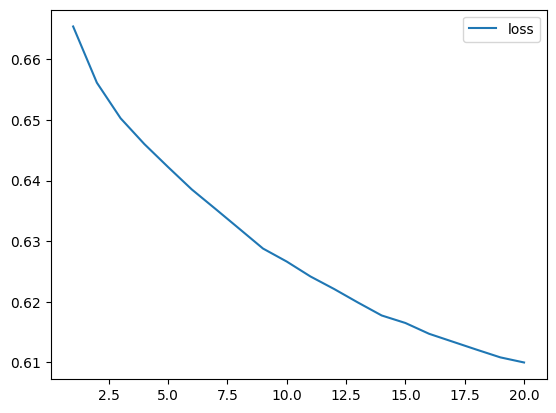

In [39]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history)

# Increase the index by 1 to match the number of epochs
history_df.index += 1

# Plot the loss
history_df.plot(y="loss")
plt.show()

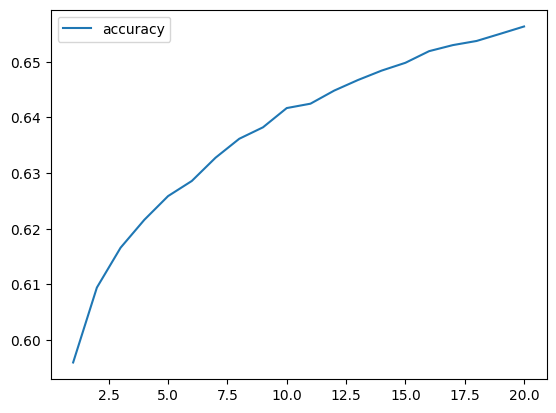

In [40]:
# Plot the accuracy
history_df.plot(y="accuracy")
plt.show()

In [41]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

2405/2405 - 2s - 984us/step - accuracy: 0.6478 - loss: 0.6173
Loss: 0.6172783970832825, Accuracy: 0.6477522253990173
